# Notebook activity A2.2  More exploring time series in R

In this notebook activity, we will use R to explore the evolution of the quarterly growth rate of the GDP in the UK over the time period from 1955 Q2 up to 2020 Q4. We will do this using the time series `gdpGrowth` from the `ukGDP` dataset (Subsection 2.4, Unit A2).

As a reminder, the variables in this dataset are described as follows.

• `year`: the year that the observation relates to

• `quarter`: the quarter (of the year) that the observation relates to, taking the value 1, 2, 3 or 4

• `gdp`: the seasonally adjusted quarterly GDP in real terms (in millions of pounds sterling (£))

• `gdpGrowth`: the seasonally adjusted quarterly GDP growth rate (%).

The data are stored in the `ukGDP` data frame.

## (a) Getting started

As usual, we start with loading the `M348` package and the `ukGDP` data frame into the session, and then using the  `head()` function to check that the data have loaded properly. 

### (i)

To do all this, run the code cell below.

In [ ]:
library(M348) 
data(ukGDP)
head(ukGDP)


###  <a class="tocSkip">

For the GDP, 2020 was an exceptional year with unusual low and high growth rates in the 2nd and 3rd quarter. This would exert undesirable influence on the regression line. It is therefore best to drop these observations from the time series. You can use the `head()` function to delete the final four rows of the data by defining a new data frame `gdpTo2019` in the following way.
```
gdpTo2019 -> head(ukGDP, -4)
```

### (ii)

Run the code given below to create `gpdTo2019` data frame, obtain a summary of the `gdpGrowth` time series and the confirm the time periods in the new data frame.

In [ ]:
gdpTo2019 <- head(ukGDP, -4)
summary(gdpTo2019$gdpGrowth)
table(gdpTo2019$year)
table(gdpTo2019$quarter)

## (b) Creating a time series object for the GDP growth rate

In order to analyse the GDP data, we need to define it as a time series object in R, indicating the year and quarter in which the time series starts as well as its frequency (which is 4 for quarterly data).

### (i)

Run the code cell below to set up this dataset as time series object in R with quarterly data. 

In [ ]:
# Creating a time series version of the `gdpGrowth` variable, 
# saving the resulting time series in `gdpGrowthTS`
gdpGrowthTS <- ts(gdpTo2019$gdpGrowth, start = c(1955, 2), frequency = 4)

# Display the first and last few lines of the time series 
window(gdpGrowthTS, end = c(1960, 4))
window(gdpGrowthTS, start = c(2016, 1))

## (c) Creating plots for the GDP growth rate

In this part you will use plots to explore GDP growth rate. 
In part (c) of Notebook activity A2.1, you learnt how to use the `lag.plot()` function to produce the autoregressive scatterplots of a time series. In part (e) of Notebook activity A2.1, you learnt how to use the `acf()` R function to produce the correlogram of the time series. Here, you will plot the `gdpGrowthTS` time series over time and produce autoregressive scatterplots and a correlogram plot for it.

### (i)

Use the code cell below to produce the time plot of `gdpGrowthTS`. (Look back at Notebook activity A1.4 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

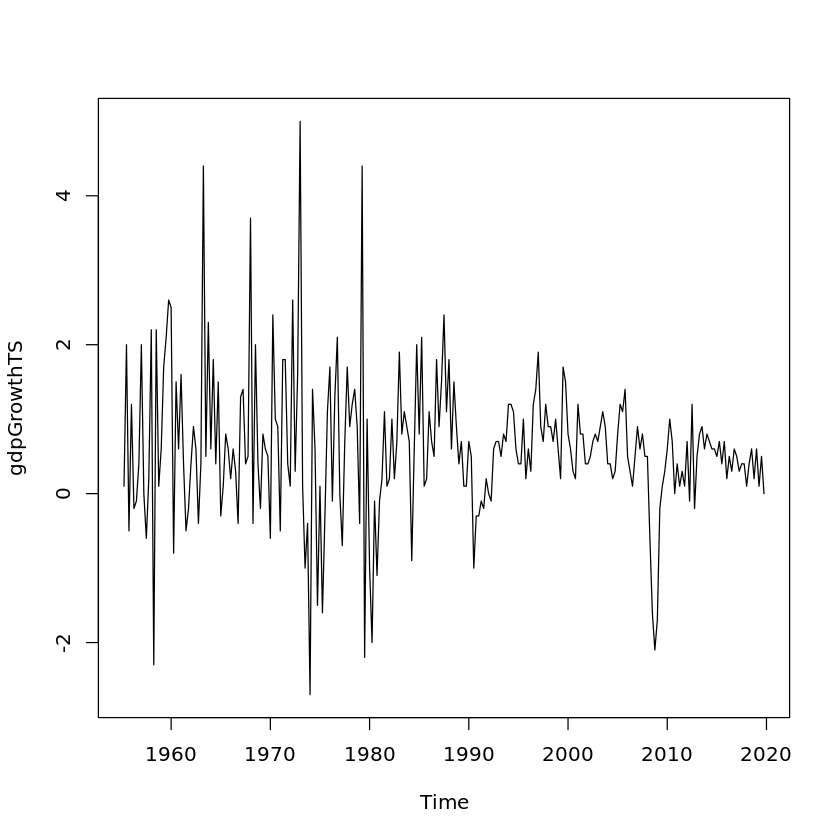

In [4]:
plot(gdpGrowthTS)

### (ii)

Use the code cell below to produce autoregressive scatterplots for `gdpGrowthTS`, with lags going back up to four quarters in the past. (Look back at Notebook activity A2.1 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

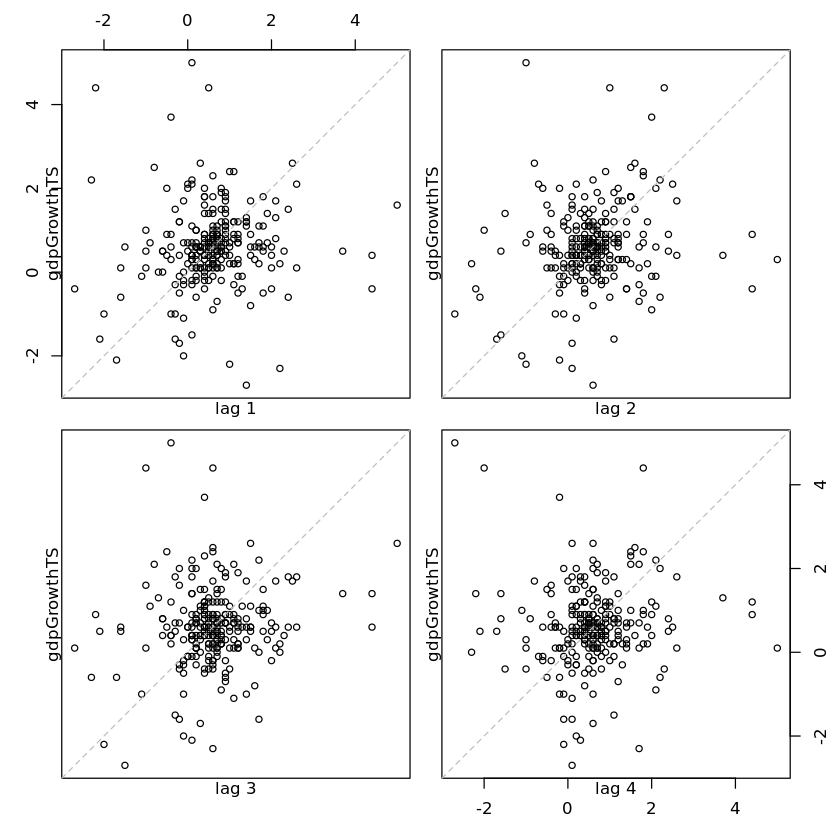

In [5]:
lag.plot(gdpGrowthTS, lags = 4, do.lines = FALSE)

### (iii)

Use the code cell below to produce a correlogram for `gdpGrowthTS`. (Look back at Notebook activity A2.1 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

Running the code cell below plots a correlogram for `gdpGrowthTS`.

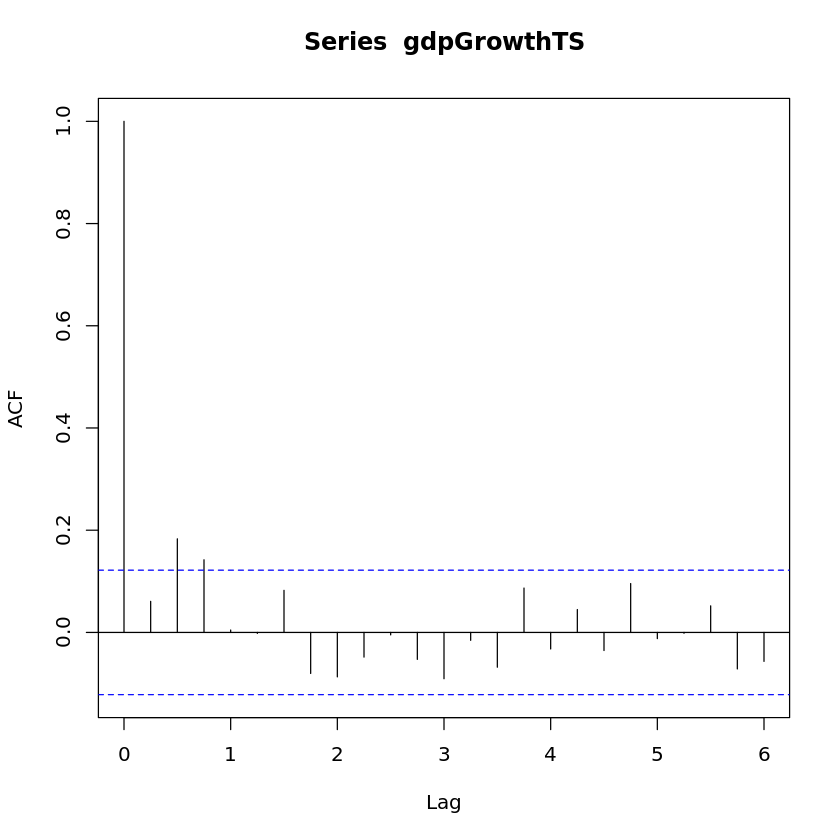

In [6]:
acf(gdpGrowthTS)

### (iv)

Referring to the plots obtained in parts (i) to (iii) above, discuss the extent to which `gdpGrowthTS` exhibits persistence or momentum over time.

#### Solution <a class="tocSkip">

From part (i), the time plot for `gdpGrowthTS` shows that the quarterly GDP growth rate does not seem to exhibit momentum or persistence. There is no discernible trend. Rather, the quarterly GDP growth rate appears to fluctuate around a relatively stable mean growth rate (which seems to be just above zero). The amplitude of the fluctuations are noticeably greater in the period before the 1990s.

From part (ii), the scatterplots of the GDP growth rate against its lagged values indicate that there is no autocorrelation. This is corroborated by the correlogram in part (iii), which shows that the autocorrelation coefficients are very small.

## (d) Regressing the GDP growth rate on its lags

Recall, from part (d) of Notebook activity A2.1, that you can obtain the lagged time series variable `lagY` from a time series variable `Y` using the command
```
lagY <- c(NA, Y[-length(Y)])
```

Then you can simply regress the values of `Y` on its lagged values `lagY` using the `lm()` as follows.
```
model <- lm(Y ~ lagY)
```

Now, you will be asked to regress `gdpGrowthTS` on its lag of order 1 and interpret the regression results.

### (i)

Using the code cell below create a variable which is the lag 1 of gdpGrowthTS, convert this lagged variable into a time series object, regress `gdpGrowthTS` on its lag of order 1 and obtain a summary of the regression results.

#### Solution <a class="tocSkip">

The required code and resulting output are given below. 

In [7]:
# Creating the lagged time series and saving it in the `lagGdpGrowth` object
lagGdpGrowth <-  c(NA, gdpGrowthTS[-length(gdpGrowthTS)])

# Creating a time series object of the lagged time series
lagGdpGrowthTS <- ts(lagGdpGrowth, start = c(1955, 2), frequency = 4)

# Regressing `gdpGrowthTS` on its lagged values, `LgdpGrowthTS`
reg2 <- lm(gdpGrowthTS ~ lagGdpGrowthTS)

# Obtaining a summary of the regression results
summary(reg2)


Call:
lm(formula = gdpGrowthTS ~ lagGdpGrowthTS)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2449 -0.4295 -0.0271  0.3873  4.3333 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.56929    0.07133   7.981 4.89e-14 ***
lagGdpGrowthTS  0.06085    0.06240   0.975     0.33    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9711 on 256 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.003701,	Adjusted R-squared:  -0.0001905 
F-statistic: 0.951 on 1 and 256 DF,  p-value: 0.3304


### (ii)

Interpret the estimated coefficient of the lagged variable `lagGdpGrowthTS` of the model estimated in part (i).

#### Solution <a class="tocSkip">

The coefficient of the lagged variable `lagGdpGrowthTS` is estimated to be 0.061, with a $p$-value of 0.33. The magnitude of the coefficient is small and close to zero, while the $p$-value is large. So, we can conclude that there is no evidence of persistence in the GDP growth rate. 

### (iii)

Upon reflection on these results, what is your takeaway message from this exercise in terms of predicting the GDP growth rate based on its past evolution? 

#### Solution <a class="tocSkip">

The quarterly growth rate of the GDP is a poor predictor of what its value will be in the next quarter. The historical mean will do better as a predictor than the previous values of GDP.